In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix
    , classification_report
    , precision_recall_curve
    , roc_curve
    , roc_auc_score
    , ConfusionMatrixDisplay
    , PrecisionRecallDisplay
    , RocCurveDisplay
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Load data and create DataFrame
data = load_breast_cancer()

df = pd.DataFrame(data.data
                  , columns=data.feature_names)
df['target'] = data.target

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
           , c=colors
          );


# ML Process:

from sklearn.model_selection import train_test_split

In [4]:
# 2. Create X and y from DataFrame
X = df.drop(columns=['target'])
y = df['target']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
    , random_state=27
)

In [6]:
# 4. Scaling with StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# 5. Set up Logistic Regression and GridSearchCV for C parameter

logreg = LogisticRegression(
    solver='liblinear'
    , max_iter=1000
    , random_state=27
)

param_grid = {
   # 'C': [0.001, 0.01, 0.1, 1, 10, 100]
    'C': np.logspace(-4, 4, 20)
}

grid_search = GridSearchCV(
    estimator=logreg
    , param_grid=param_grid
    , cv=5
    , scoring='accuracy'
    #, n_jobs=-1
)


           , c=colors
          );


# ML Process:

from sklearn.model_selection import train_test_split

In [8]:
# 6. Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=27,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])},
             scoring='accuracy')

In [9]:
# 7. Best C value and evaluation
print("Best C value found:", grid_search.best_params_['C'])
print("Best cross-validation accuracy:", grid_search.best_score_)
print("Test set accuracy:", grid_search.score(X_test_scaled, y_test))

Best C value found: 0.615848211066026
Best cross-validation accuracy: 0.9714285714285715
Test set accuracy: 0.9912280701754386


In [10]:
grid_search.best_estimator_

LogisticRegression(C=0.615848211066026, max_iter=1000, random_state=27,
                   solver='liblinear')

In [11]:
best_logreg = grid_search.best_estimator_
coefficients = best_logreg.coef_[0]
feature_names = X.columns

In [12]:
best_logreg

LogisticRegression(C=0.615848211066026, max_iter=1000, random_state=27,
                   solver='liblinear')

In [17]:
best_logreg.coef_[0]

array([-0.43114554, -0.3951998 , -0.41241357, -0.49450274, -0.11577255,
        0.32805213, -0.68928327, -0.89156773,  0.27185802,  0.2955889 ,
       -1.0197023 ,  0.07116626, -0.71119626, -0.78622723, -0.20787767,
        0.60139654,  0.06820162, -0.25383965,  0.24084613,  0.48783192,
       -0.78636764, -0.93412656, -0.70224233, -0.78765815, -0.74086154,
       -0.01171913, -0.71500427, -0.60303791, -0.73786761, -0.35906203])

In [ ]:
# for the coef plot, need feature names & coefs

feature_names = X.columns.tolist()
coefficients = best_model.coef_[0]

In [13]:
# 8. Visualize coefficients
coef_df = pd.DataFrame({
    'feature': feature_names
    , 'coefficient': coefficients
})
coef_df_sorted = coef_df.sort_values(
    'coefficient', ascending=True)

coef_df_sorted.head()

,feature,coefficient
10,radius error,-1.019702
21,worst texture,-0.934127
7,mean concave points,-0.891568
23,worst area,-0.787658
20,worst radius,-0.786368


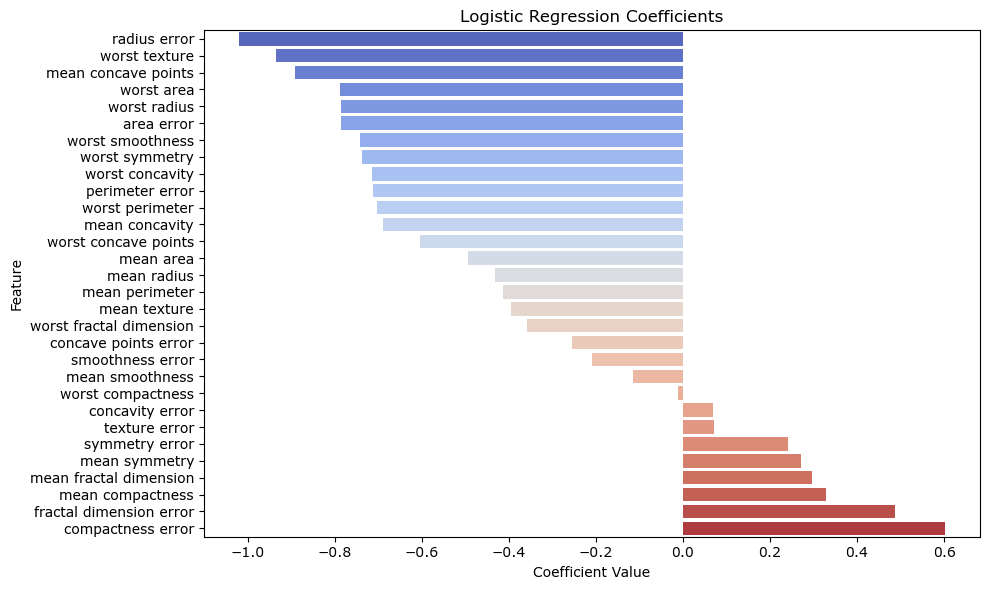

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=coef_df_sorted
    , x='coefficient'
    , y='feature'
    , palette='coolwarm'
)
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Confusion Matrix Array: [[44  1]
 [ 0 69]]


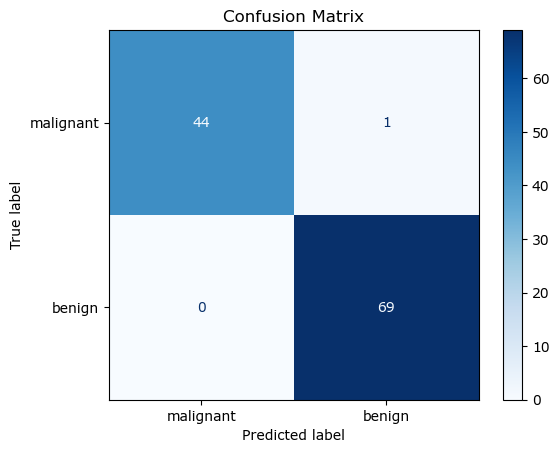

In [15]:
# 9. Predictions and evaluation
y_pred = best_logreg.predict(X_test_scaled)
y_proba = best_logreg.predict_proba(
    X_test_scaled)[:,1]

# Confusion matrix array
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix Array:", cm)

# Confusion matrix plot
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm
    , display_labels=data.target_names
)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [16]:
# Classification report
report = classification_report(
    y_test, y_pred
    , target_names=data.target_names
)
print("Classification Report:", report)

Classification Report:               precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        45
      benign       0.99      1.00      0.99        69

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



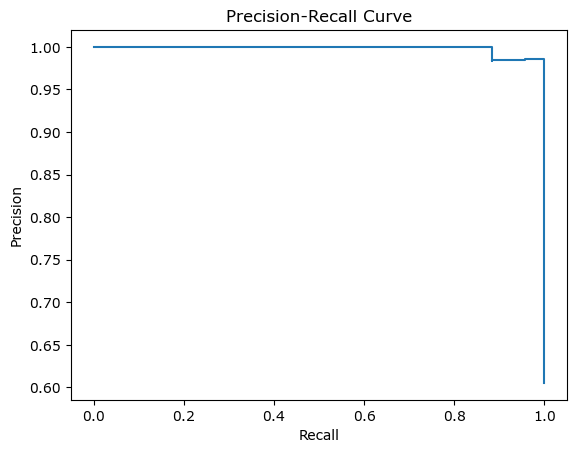

In [17]:
# 10. Precision-Recall curve
precision, recall, thresholds_pr =\
    precision_recall_curve(
        y_test, y_proba
    )
pr_display = PrecisionRecallDisplay(
    precision=precision
    , recall=recall
)
pr_display.plot()
plt.title("Precision-Recall Curve")
plt.show()

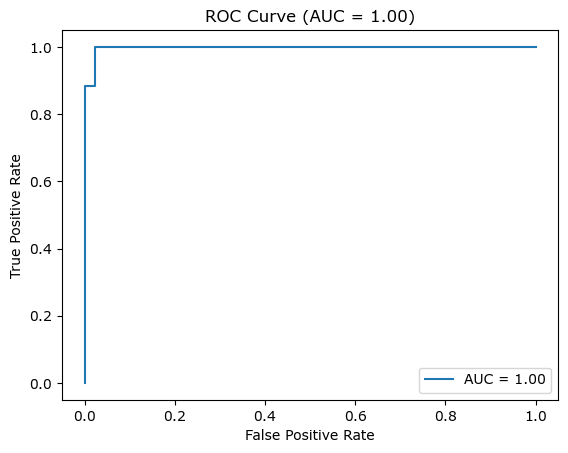

In [18]:
# 11. ROC curve
fpr, tpr, thresholds_roc = roc_curve(
    y_test, y_proba
)
roc_auc = roc_auc_score(y_test
                        , y_proba
                       )
roc_display = RocCurveDisplay(
    fpr=fpr, tpr=tpr
    , roc_auc=roc_auc
)
roc_display.plot()
plt.title("ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.show()

In [19]:
import numpy as np

In [30]:
np.linspace(0.01, 100, 2).tolist()

[0.01, 100.0]

In [4]:
np.logspace(-2, 2, 3).tolist()

[0.01, 1.0, 100.0]

In [3]:
np.logspace(-4, 4, 9).tolist()

[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

In [31]:
np.logspace(-5, 5, 11).tolist()

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]

In [ ]:
{'C': np.logspace(-4, 4, 9)}

In [ ]:
param_grid = [
    {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
    , {'penalty':['none', 'elasticnet', 'l1', 'l2']}
    , {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]



grid_search = GridSearchCV(
    estimator = logreg
    , param_grid = param_grid
    , scoring = 'accuracy'
    , cv = 5
    , verbose=0)


grid_search.fit(X_train, y_train)